
# <center><b>Using cross validation on Tumor Diagnosis dataset to improve accuracy<center><b>
    
Cross-validation is a way to tune the hyperparameter in the algorithm to improve accuracy of the model in the unknown testing scenerios. This specific project is about classifying if a tumor is Malignant or benign. We will build a model that will have the best accuracy on a test case with an unknown dataset. We can build our model on a range of hyperparameters, we need to make sure that our choice of hyperparameter maximizes the testing accuracy. Since we can not test our data on a set of data that we dont have yet, we have to be clever. We follow the following steps
    
1. We segment the dataset into parts and treat one part as training data and other part as testing data. 
2. We can shuffle between the segments of data to test our accuracy of a certain hyperparameter.
3. Through this test we find the hyperparameter that maximizes the testing accuracy.
    
    
We are going to use the package <b>Scikit-learn</b> for this purpose. <b>Scikit-learn</b> comes with a lot of tools of machine learning that will be useful for this work and it will keep the code concise. 
    
## <b> Import the libraries

In [1]:
#Data analysis tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Machine learning tools
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms

# <b> The cancer dataset<b>
    
The dataset we are using here is the cancer dataset from the Scikit-learn dataset library. The data set is the "Breast cancer wisconsin (diagnostic) dataset". It has 569 instances and 30 features. The features are the characteristics of the tumor of the patients. This data is also labeled if it is malignant or benign. We will train our model based on this data and do cross validation to find the best hyperparameter. For further reading you can check the link https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset . Let's get the data!

In [2]:
data_cancer = datasets.load_breast_cancer()

We can know more about the data from the attributes of the dataset.

In [3]:
data_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
print(data_cancer.target_names)

['malignant' 'benign']


We have the dataset. Now we have to get the lables and features data separately to build the classification model.

In [5]:
y = data_cancer.target # Labels 'Malignant = 0' and 'Benign = 1'
x = data_cancer.data # Features set

## <b> Preprocessing
    
We can preprocess the data to make it easier for the model development. Besides it is easy to compare the features when they are in a similar scale. We are going to convert the features into normal distribution. This process makes the mean zero and variance 1. That helps us to easily understand the comparison between the affect of diferent features on the classification.

In [6]:
x = preprocessing.scale(x)

## <b> Visualizing the data
    
Here we will visualize the data to get an understanding of what is going on in the machine learning process. A simple way to explain classification is like to find a plane between the dataset to separate them in two different classes based on their labels. If we get a new unlabeled data, we can find its labels based on which side of the plane the data is on. Hopefully, the visualization will make the concept clear.

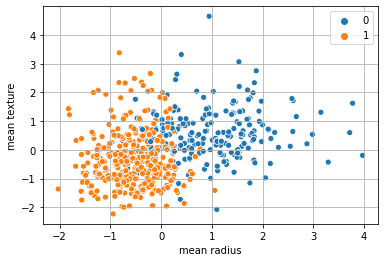

In [7]:
sns.scatterplot(x[:,0], x[:,1], hue=y)

plt.xlabel('mean radius')
plt.ylabel('mean texture')
#plt.set_zlabel('mean perimeter')

plt.grid(True)

plt.show()

From the graph we can see that the points can be separated upto some accuracy with a line. The purpose of the classifier is to find the best line for this job. We are going to start with a range of hyperparameter and run the cross-validation with a small increment in the hyperparameter. We are going to observe how the accuracy varies with the change in hyperparameters.

In [8]:
alpha = np.arange(1e-15, 1, 0.001 )
val_scores = np.zeros((len(alpha), 1))
val_scores.shape

(1000, 1)

We are going to run find classifier model with the Stochastic Gradient Descent classifier algorithm. The loss function we will use is the Hinge Loss and penalty will be based on 'l2 norm'. The penalty is the term of the loss function that penalizes you based on the width of the margin of the classifier booundary.

In [9]:
for i,a in enumerate(alpha):
    
    #creating a classifier object with the desired parameters 
    cancer_model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=a)
    
    #Cross-validating the classifier with the data with 5 fold cross validation
    score = ms.cross_val_score(cancer_model, x, y, cv = 5)
    val_scores[i] = score.mean()

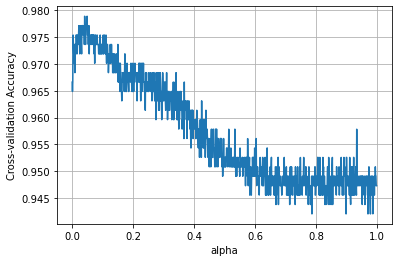

In [10]:
plt.plot(alpha, val_scores)

plt.xlabel('alpha')
plt.ylabel('Cross-validation Accuracy')
plt.grid(True)

plt.show()

From this graph, the alpha that maximizes the validation score is the best hyperparameter to classify this dataset.

In [11]:
tuned_alpha= alpha[np.argmax(val_scores)]
print('The chosen alpha is %s.'%tuned_alpha)

The chosen alpha is 0.041000000000001.


This is the alpha that we eill use to train our model.

In [12]:
classifier = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=tuned_alpha)
final_model = classifier.fit(x,y)

print('Training Accuracy : %.4f'%final_model.score(x,y))

Training Accuracy : 0.9824


Cross-validation does the job of the model validation on a testing dataset. So, we won't use a separate testing dataset.

## <b>Model Visualization<b>
    
We are going to visualize the model we have built for two features. We will be able to see the plane that separates the data.

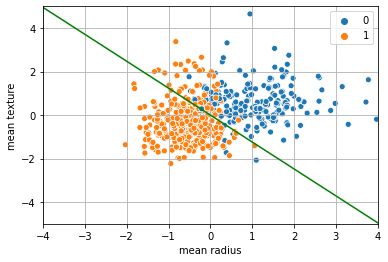

In [13]:
m = -final_model.coef_[0,1]/final_model.coef_[0,0]

x1 = np.arange(-5,5, 0.001)
y1 = m*x1

plt.plot( x1, y1, c='g')

sns.scatterplot(x[:,0], x[:,1], hue=y)

plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.xlim(-4,4)
plt.ylim(-5,5)
#plt.set_zlabel('mean perimeter')

plt.grid(True)

plt.show()